## **How to determine correct number of clusters (k)?** **| |Elbow Curve Method| |**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , KFold
from sklearn.cluster import KMeans

In [48]:
df = pd.read_csv('Dataset/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [50]:
df.describe(exclude='object')

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [51]:
correlation = df[['Age','Income($)']]
hmap = correlation.corr()
hmap

,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


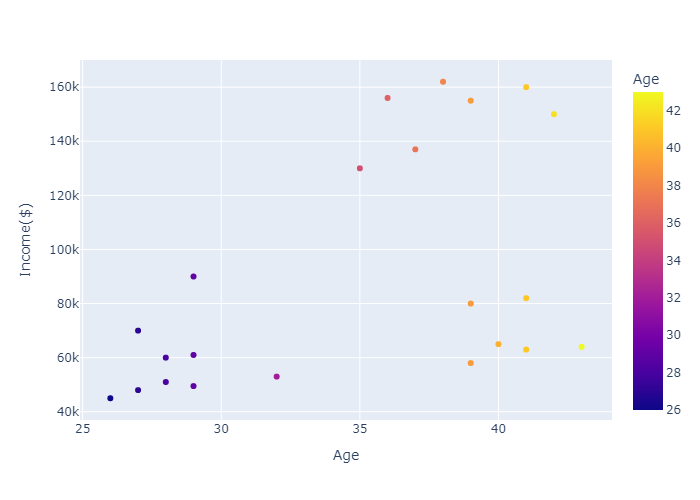

In [52]:
fig=px.scatter(df, x ='Age' , y ='Income($)' , color = 'Age')

fig.write_image("scatter_plot.png")

import plotly.io as pio
from IPython.display import Image,display
Image("scatter_plot.png")

**By Looking at the above Scatter plot we can clearly see that there are 3 clusters wo can Implement KMeans Algo**

In [53]:
km = KMeans(n_clusters=3)
km.fit(correlation) #<------ correlation = df['Age','Income($)']
y_predicted = km.predict(correlation)
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [54]:
df['cluster']= y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [55]:
# Centroid of Clusters
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [56]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


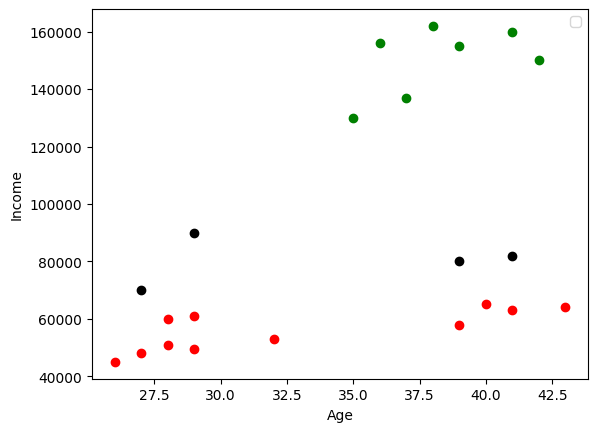

In [57]:
plt.scatter (df0. Age, df0[ 'Income($)'], color='green')
plt.scatter(df1. Age, df1[ 'Income($)'], color='red')
plt.scatter(df2. Age, df2 [ 'Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

**Our cluster is bad , because our scaling is disturbed in the above plot**

In [58]:
scaler = MinMaxScaler()
scaler.fit(df[ ['Income($)'] ] )
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [59]:
df['Income($)']

0     0.213675
1     0.384615
2     0.136752
3     0.128205
4     0.897436
5     0.940171
6     0.982906
7     1.000000
8     0.948718
9     0.726496
10    0.786325
11    0.000000
12    0.025641
13    0.051282
14    0.038462
15    0.068376
16    0.170940
17    0.153846
18    0.162393
19    0.299145
20    0.316239
21    0.111111
Name: Income($), dtype: float64

In [60]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [61]:
df['Age']

0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

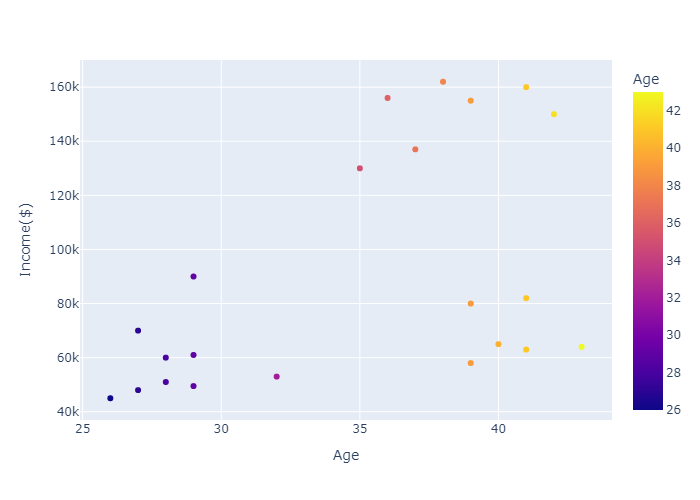

In [62]:
fig1 = px.scatter(df , x='Age', y = 'Income($)', color='cluster')

fig.write_image("scatter_plot1.png")

Image("scatter_plot1.png")

In [63]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [64]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [65]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [66]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


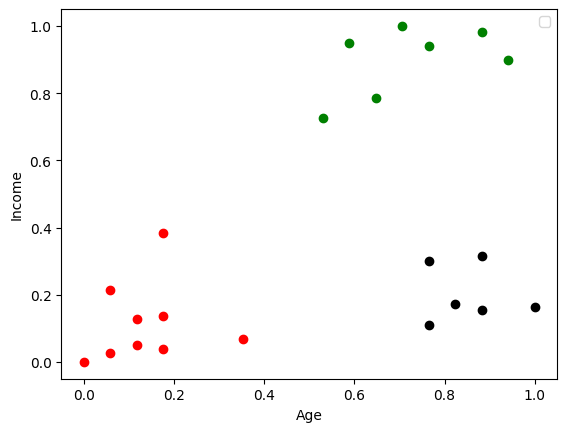

In [67]:
plt.scatter (df0. Age, df0[ 'Income($)'], color='green')
plt.scatter(df1. Age, df1[ 'Income($)'], color='red')
plt.scatter(df2. Age, df2 [ 'Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

 **visualization centroids of clusters**

**To find appropriate no of clusters , for more features in data we'll plot Elbow Curve**

In [68]:
sse = []

k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)                                  #<---------- SSE (Sum of Squared Error)

In [69]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3881529166478744,
 0.3734606706381617,
 0.24175094745585396,
 0.19522674746719498,
 0.1327661931978319,
 0.12419833826282528]

**Elbow Curve Plot using simple (plot)**

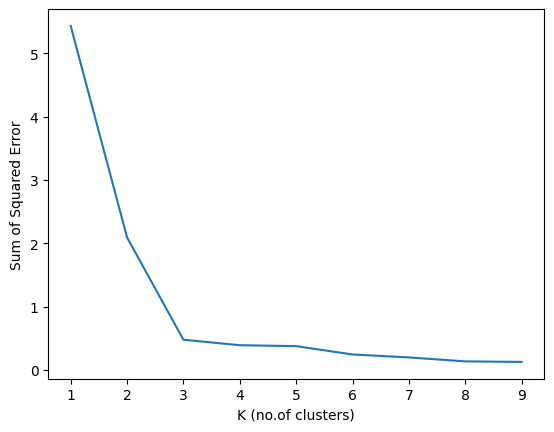

In [70]:
plt.xlabel("K (no.of clusters)")
plt.ylabel('Sum of Squared Error')
plt.plot(k_range , sse)